In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [3]:
train_data = pd.concat((pd.DataFrame(train_data).rename(columns={0:'x1',1:'x2'}), pd.Series(train_labels)), axis=1).rename(columns={0:'label'})
train_data

,x1,x2,label
0,0.276266,-1.854628,0.0
1,0.623901,1.145311,0.0
2,1.037190,1.886639,0.0
3,-0.111698,-0.362101,0.0
4,0.148675,-0.437783,0.0
...,...,...,...
195,3.291618,2.683931,1.0
196,2.100323,1.349604,1.0
197,2.445061,2.593534,1.0
198,1.762466,2.085415,1.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(train_data[['x1','x2']], train_data['label'], test_size=0.1, random_state=42)

In [5]:
##########################
X_test

,x1,x2
95,0.338288,0.510286
15,0.977542,-0.138585
30,-0.230373,0.120195
158,0.841781,2.127431
128,2.068184,-0.094580
115,2.996430,3.256777
69,1.348079,-1.964012
170,1.542342,2.713973
174,1.859452,2.376424
45,-0.976937,0.468070


In [6]:
distances_to_15 = pd.concat(((((X_train['x1'] - X_test.loc[15]['x1'])**2)**0.5).sort_index(), (((X_train['x2'] - X_test.loc[15]['x2'])**2)**0.5).sort_index()), axis=1).rename(columns={'x1':'x1 distance to X_test[15]', 'x2': 'x2 distance to X_test[15]'})

In [7]:
(((X_train['x1'] - X_test.loc[15]['x1'])**2)**0.5).sort_index()

0      0.701276
1      0.353641
2      0.059649
3      1.089240
4      0.828867
         ...   
195    2.314076
196    1.122781
197    1.467519
198    0.784924
199    1.289560
Name: x1, Length: 180, dtype: float64

In [8]:
(((X_train['x2'] - X_test.loc[15]['x2'])**2)**0.5).sort_index()

0      1.716043
1      1.283897
2      2.025224
3      0.223516
4      0.299198
         ...   
195    2.822517
196    1.488190
197    2.732119
198    2.224000
199    0.506095
Name: x2, Length: 180, dtype: float64

In [9]:
(distances_to_15['x1 distance to X_test[15]'] + distances_to_15['x2 distance to X_test[15]']).sort_values()

42     0.061944
67     0.221673
61     0.222159
62     0.266552
98     0.382896
         ...   
102    5.538805
20     5.616698
104    5.629387
100    5.864865
155    6.365911
Length: 180, dtype: float64

In [10]:
X_train.loc[42].to_list(), y_train.loc[42].item()

([0.9341480856960672, -0.1200345417140056], 0.0)

In [11]:
X_train.loc[67].to_list(), y_train.loc[67].item()

([1.056138070998517, 0.004491748502458855], 0.0)

In [12]:
X_train.loc[61].to_list(), y_train.loc[61].item()

([1.0236248348955888, -0.3146607145200693], 0.0)

In [13]:
X_train.loc[62].to_list(), y_train.loc[62].item()

([1.0729060609556798, 0.032602126347239926], 0.0)

In [14]:
X_train.loc[98].to_list(), y_train.loc[98].item()

([1.145372412072999, 0.07647991830718862], 0.0)

In [15]:
# prediction based on 5 points is equal to true label
X_test.loc[15].to_list(), y_test.loc[15].item()

([0.9775417643220472, -0.13858524983596474], 0.0)

In [16]:
####################

In [17]:
distances_to_115 = pd.concat(((((X_train['x1'] - X_test.loc[115]['x1'])**2)**0.5).sort_index(), (((X_train['x2'] - X_test.loc[115]['x2'])**2)**0.5).sort_index()), axis=1).rename(columns={'x1':'x1 distance to X_test[115]', 'x2': 'x2 distance to X_test[115]'})

In [18]:
(((X_train['x1'] - X_test.loc[115]['x1'])**2)**0.5).sort_index()

0      2.720165
1      2.372529
2      1.959240
3      3.108129
4      2.847755
         ...   
195    0.295187
196    0.896108
197    0.551370
198    1.233964
199    0.729329
Name: x1, Length: 180, dtype: float64

In [19]:
(((X_train['x2'] - X_test.loc[115]['x2'])**2)**0.5).sort_index()

0      5.111405
1      2.111465
2      1.370138
3      3.618878
4      3.694560
         ...   
195    0.572845
196    1.907172
197    0.663243
198    1.171362
199    2.889267
Name: x2, Length: 180, dtype: float64

In [20]:
(distances_to_115['x1 distance to X_test[115]'] + distances_to_115['x2 distance to X_test[115]']).sort_values()

192     0.089992
162     0.266827
104     0.467905
135     0.503501
112     0.611873
         ...    
60      8.609107
94      8.761039
90      9.131541
19      9.454575
31     10.001800
Length: 180, dtype: float64

In [21]:
X_train.loc[192].to_list(), y_train.loc[192].item()

([3.0381977460522025, 3.305001654849911], 1.0)

In [22]:
X_train.loc[162].to_list(), y_train.loc[162].item()

([3.0606375594015702, 3.0541566061690757], 1.0)

In [23]:
X_train.loc[104].to_list(), y_train.loc[104].item()

([3.337951269419454, 3.1303927029088987], 1.0)

In [24]:
X_train.loc[135].to_list(), y_train.loc[135].item()

([2.7471236756221304, 3.0025825740901726], 1.0)

In [25]:
X_train.loc[112].to_list(), y_train.loc[112].item()

([3.307995424538661, 2.95646896581436], 1.0)

In [26]:
# prediction based on 5 points is equal to true label
X_test.loc[115].to_list(), y_test.loc[115].item()

([2.996430445852188, 3.256776606255314], 1.0)

In [27]:
#############################

In [28]:
distances_to_68 = pd.concat(((((X_train['x1'] - X_test.loc[68]['x1'])**2)**0.5).sort_index(), (((X_train['x2'] - X_test.loc[68]['x2'])**2)**0.5).sort_index()), axis=1).rename(columns={'x1':'x1 distance to X_test[68]', 'x2': 'x2 distance to X_test[68]'})

In [29]:
(((X_train['x1'] - X_test.loc[68]['x1'])**2)**0.5).sort_index()

0      0.062436
1      0.410071
2      0.823361
3      0.325528
4      0.065155
         ...   
195    3.077788
196    1.886493
197    2.231231
198    1.548636
199    2.053272
Name: x1, Length: 180, dtype: float64

In [30]:
(((X_train['x2'] - X_test.loc[68]['x2'])**2)**0.5).sort_index()

0      0.158912
1      2.841027
2      3.582355
3      1.333615
4      1.257933
         ...   
195    4.379647
196    3.045320
197    4.289250
198    3.781131
199    2.063226
Name: x2, Length: 180, dtype: float64

In [31]:
(distances_to_68['x1 distance to X_test[68]'] + distances_to_68['x2 distance to X_test[68]']).sort_values()

0      0.221348
7      0.405576
54     0.607307
41     0.812094
53     1.000148
         ...   
192    7.825086
102    7.859648
104    7.950230
100    8.185708
155    8.686753
Length: 180, dtype: float64

In [32]:
X_train.loc[0].to_list(), y_train.loc[0].item()

([0.27626589002131874, -1.854628078806505], 0.0)

In [33]:
X_train.loc[7].to_list(), y_train.loc[7].item()

([0.5398396138576749, -1.7752822871082987], 0.0)

In [34]:
X_train.loc[54].to_list(), y_train.loc[54].item()

([0.5344514601052733, -1.4090308592399106], 0.0)

In [35]:
X_train.loc[41].to_list(), y_train.loc[41].item()

([0.05727976180829884, -1.0401715743881583], 0.0)

In [36]:
X_train.loc[53].to_list(), y_train.loc[53].item()

([-0.2536505059057253, -1.1630485919814797], 0.0)

In [37]:
# prediction based on 5 points is equal to true label
X_test.loc[68].to_list(), y_test.loc[68].item()

([0.21382977940222148, -1.695715917507781], 0.0)

In [38]:
#################################

In [39]:
distances_to_68 = pd.concat((abs(X_train['x1'] - X_test.loc[68]['x1']).sort_index(), abs(X_train['x2'] - X_test.loc[68]['x2']).sort_index()), axis=1).rename(columns={'x1':'x1 abs distance to X_test[68]', 'x2': 'x2 abs distance to X_test[68]'})

In [40]:
abs(X_train['x1'] - X_test.loc[68]['x1']).sort_index()

0      0.062436
1      0.410071
2      0.823361
3      0.325528
4      0.065155
         ...   
195    3.077788
196    1.886493
197    2.231231
198    1.548636
199    2.053272
Name: x1, Length: 180, dtype: float64

In [41]:
abs(X_train['x2'] - X_test.loc[68]['x2']).sort_index()

0      0.158912
1      2.841027
2      3.582355
3      1.333615
4      1.257933
         ...   
195    4.379647
196    3.045320
197    4.289250
198    3.781131
199    2.063226
Name: x2, Length: 180, dtype: float64

In [42]:
(distances_to_68['x1 abs distance to X_test[68]'] + distances_to_68['x2 abs distance to X_test[68]']).sort_values()

0      0.221348
7      0.405576
54     0.607307
41     0.812094
53     1.000148
         ...   
192    7.825086
102    7.859648
104    7.950230
100    8.185708
155    8.686753
Length: 180, dtype: float64

In [43]:
X_train.loc[0].to_list(), y_train.loc[0].item()

([0.27626589002131874, -1.854628078806505], 0.0)

In [44]:
X_train.loc[7].to_list(), y_train.loc[7].item()

([0.5398396138576749, -1.7752822871082987], 0.0)

In [45]:
X_train.loc[54].to_list(), y_train.loc[54].item()

([0.5344514601052733, -1.4090308592399106], 0.0)

In [46]:
X_train.loc[41].to_list(), y_train.loc[41].item()

([0.05727976180829884, -1.0401715743881583], 0.0)

In [47]:
X_train.loc[53].to_list(), y_train.loc[53].item()

([-0.2536505059057253, -1.1630485919814797], 0.0)

In [48]:
# prediction based on 5 points is equal to true label
X_test.loc[68].to_list(), y_test.loc[68].item()

([0.21382977940222148, -1.695715917507781], 0.0)

In [49]:
#################################

In [50]:
train = pd.read_csv('C:/datasets/spaceship-titanic/train.csv').drop(['PassengerId','Cabin','Destination','Cabin','Name'],axis=1);

In [51]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
train['HomePlanet'] = enc.fit_transform(train['HomePlanet'])
train['CryoSleep'] = enc.fit_transform(train['CryoSleep'])
train['VIP'] = enc.fit_transform(train['VIP'])
train['Transported'] = enc.fit_transform(train['Transported'])

In [52]:
train.isna().sum()

HomePlanet        0
CryoSleep         0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [53]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['RoomService'] = train['RoomService'].fillna(train['RoomService'].median())
train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].median())
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].median())
train['Spa'] = train['Spa'].fillna(train['Spa'].median())
train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].median())

In [54]:
label = train['Transported']
train = train.drop('Transported', axis=1)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

In [57]:
data = {'model_number':[],
        'n_neighbors': [],
        'weights':[],
        'algorithm':[],
        'p':[],
        'accuracy':[]}
  
# Create DataFrame
table_of_models = pd.DataFrame(data).astype('object'); table_of_models

,model_number,n_neighbors,weights,algorithm,p,accuracy


In [59]:
# # looking for best parameters
# counter = 0
# for n_neighbors in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
#     for weights in ['uniform', 'distance']:
#         for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
#             for p in [1,2,3,4,5]:
#                 KNN_clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p, n_jobs=-1)
#                 KNN_clf.fit(X_train, y_train)
#                 counter += 1
#                 accuracy = accuracy_score(y_test, KNN_clf.predict(X_test))
#                 new_row = {'model_number':counter, 'n_neighbors':n_neighbors, 'weights': weights, 'algorithm':algorithm, 'p':p, 'accuracy':accuracy}
#                 table_of_models = table_of_models.append(new_row, ignore_index=True)

In [60]:
# table_of_models.sort_values('accuracy', ascending=False)

In [61]:
KNN_clf = KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='brute', p=3, n_jobs=-1)
KNN_clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, KNN_clf.predict(X_test)); accuracy

0.7791834387579069

<AxesSubplot:xlabel='n_neighbors'>

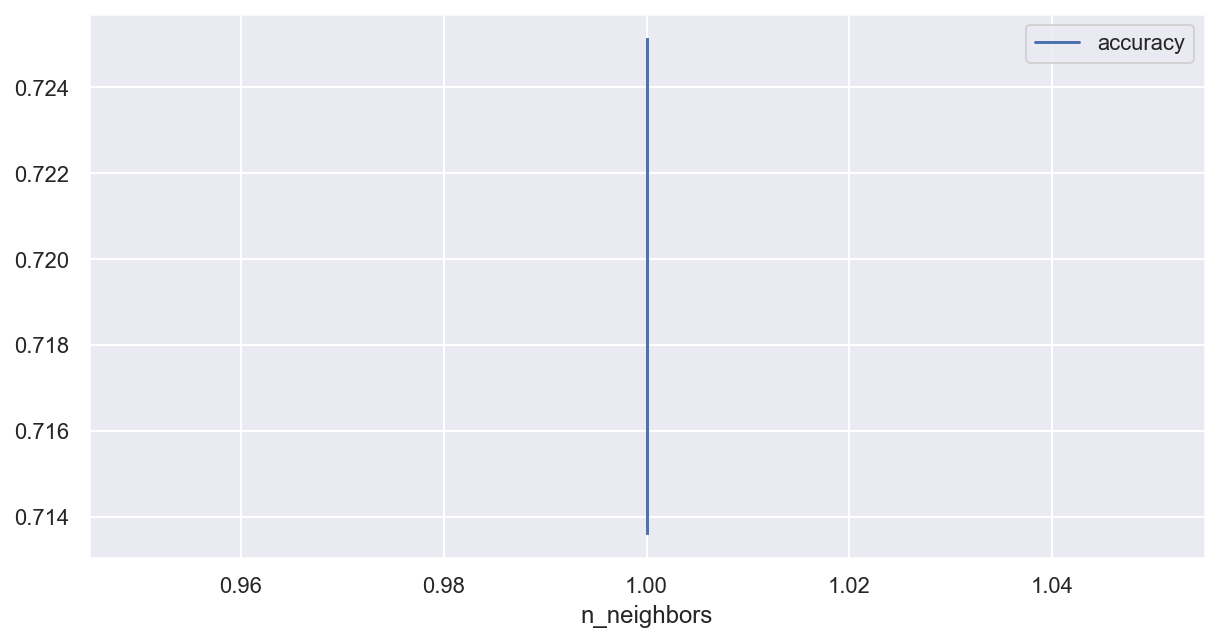

In [62]:
table_of_models.plot(x='n_neighbors', y='accuracy', figsize=(10,5), grid=True)

In [63]:
train.corr()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
HomePlanet,1.000000,0.068726,0.122943,0.044255,0.192189,0.056321,0.088970,0.045252,0.035631
CryoSleep,0.068726,1.000000,-0.068816,-0.023407,-0.216689,-0.182029,-0.188532,-0.178382,-0.171721
Age,0.122943,-0.068816,1.000000,0.032434,0.068629,0.127390,0.033148,0.120946,0.099590
VIP,0.044255,-0.023407,0.032434,1.000000,0.038011,0.054756,-0.009496,0.020355,0.054623
RoomService,0.192189,-0.216689,0.068629,0.038011,1.000000,-0.015126,0.052337,0.009244,-0.018624
FoodCourt,0.056321,-0.182029,0.127390,0.054756,-0.015126,1.000000,-0.013717,0.221468,0.224572
ShoppingMall,0.088970,-0.188532,0.033148,-0.009496,0.052337,-0.013717,1.000000,0.014542,-0.007849
Spa,0.045252,-0.178382,0.120946,0.020355,0.009244,0.221468,0.014542,1.000000,0.147658
VRDeck,0.035631,-0.171721,0.099590,0.054623,-0.018624,0.224572,-0.007849,0.147658,1.000000


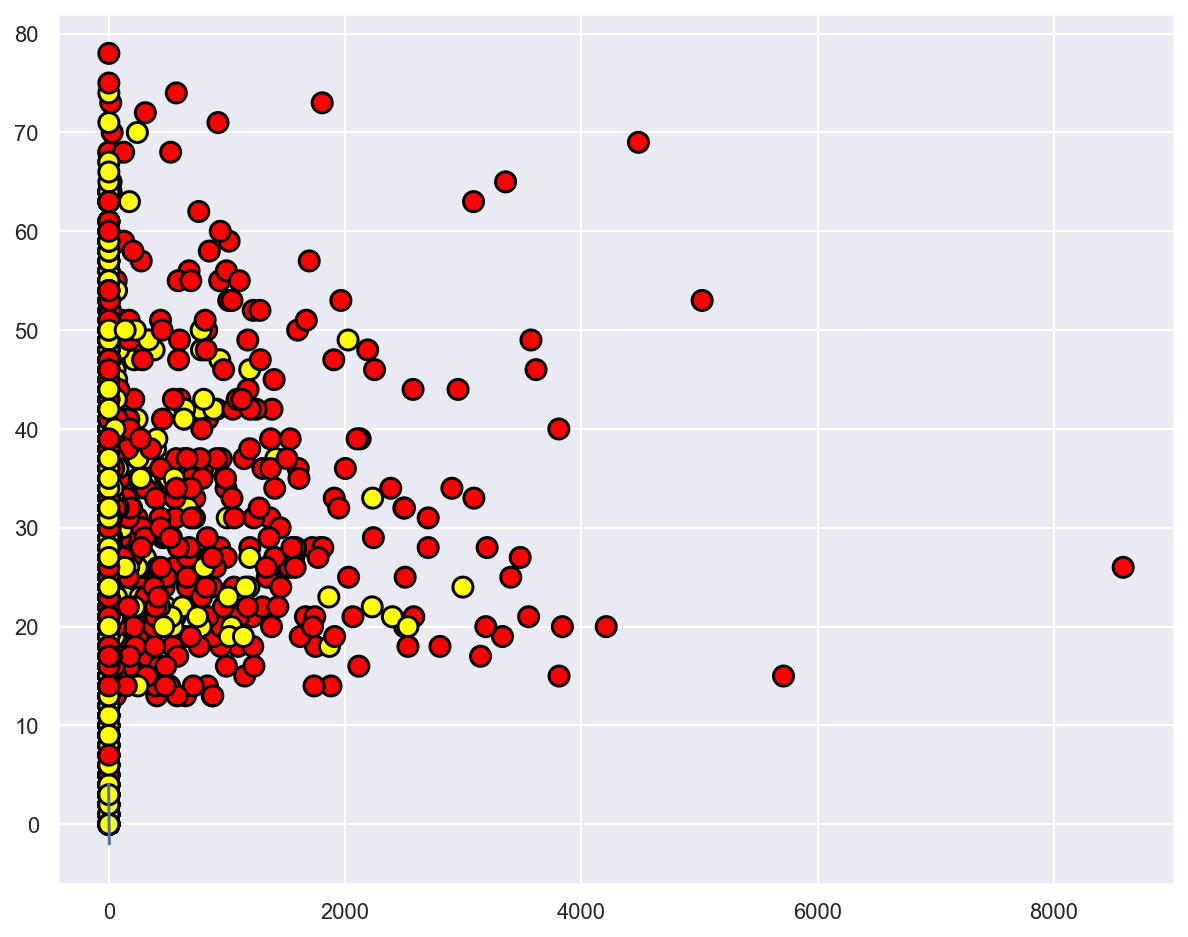

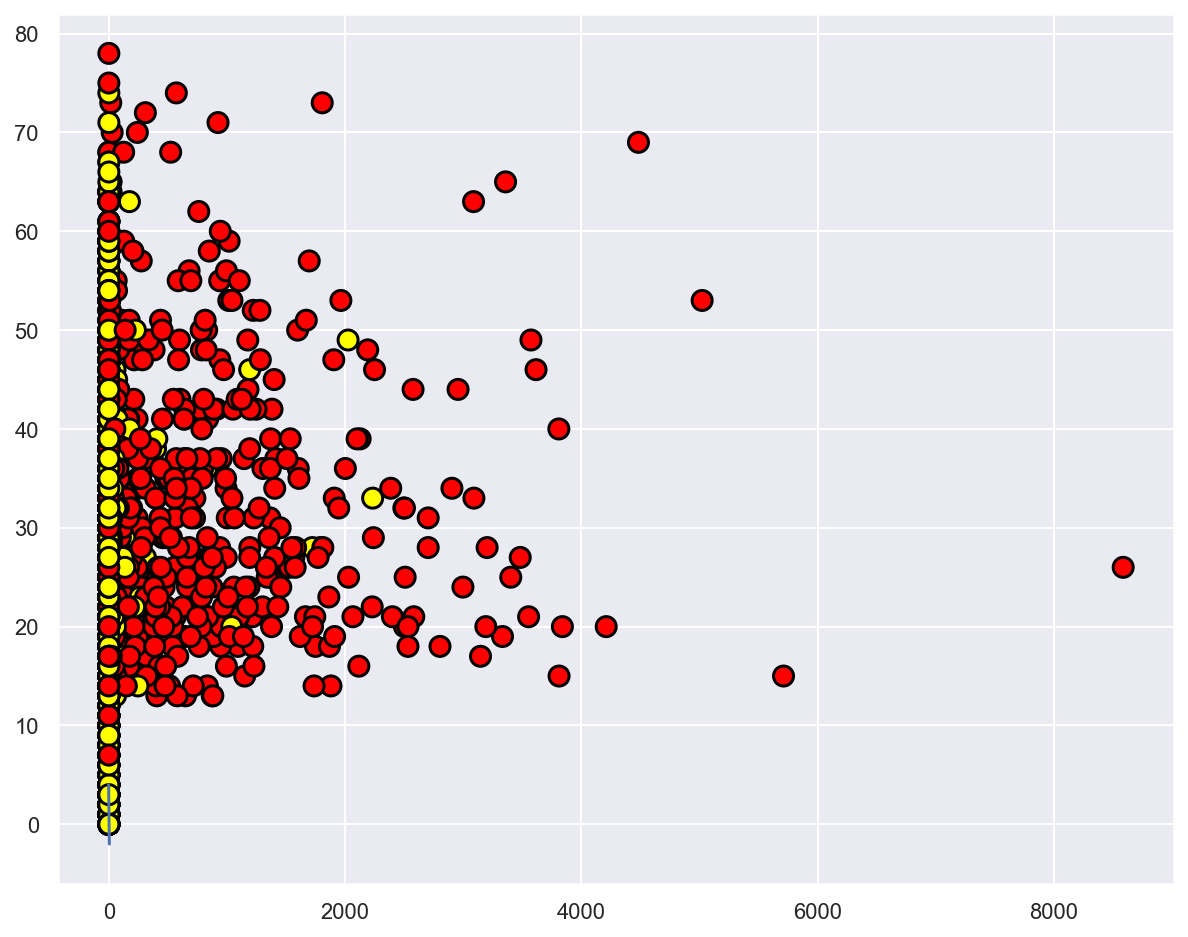

In [65]:
plt.figure(figsize=(10, 8))
plt.scatter(
    X_test['RoomService'],
    X_test['Age'],
    c=y_test,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

plt.figure(figsize=(10, 8))
plt.scatter(
    X_test['RoomService'],
    X_test['Age'],
    c=KNN_clf.predict(X_test),
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

In [66]:
###########################################
###########################################
###########################################
###########################################

In [67]:
train = pd.read_csv('C:/datasets/spaceship-titanic/train.csv').drop(['PassengerId','Cabin','Destination','Cabin','Name'],axis=1);

In [68]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
train['HomePlanet'] = enc.fit_transform(train['HomePlanet'])
train['CryoSleep'] = enc.fit_transform(train['CryoSleep'])
train['VIP'] = enc.fit_transform(train['VIP'])
train['Transported'] = enc.fit_transform(train['Transported'])

In [69]:
train.isna().sum()

HomePlanet        0
CryoSleep         0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [70]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['RoomService'] = train['RoomService'].fillna(train['RoomService'].median())
train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].median())
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].median())
train['Spa'] = train['Spa'].fillna(train['Spa'].median())
train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].median())

In [71]:
label = train['Transported']
train = train.drop('Transported', axis=1)

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train['Age'] = scaler.fit_transform(train['Age'].values.reshape(-1, 1))
train['RoomService'] = scaler.fit_transform(train['RoomService'].values.reshape(-1, 1))
train['FoodCourt'] = scaler.fit_transform(train['FoodCourt'].values.reshape(-1, 1))
train['ShoppingMall'] = scaler.fit_transform(train['ShoppingMall'].values.reshape(-1, 1))
train['Spa'] = scaler.fit_transform(train['Spa'].values.reshape(-1, 1))
train['VRDeck'] = scaler.fit_transform(train['VRDeck'].values.reshape(-1, 1))

In [73]:
train['HomePlanet'].value_counts().index.to_list(), train['CryoSleep'].value_counts().index.to_list(), train['VIP'].value_counts().index.to_list()

([0, 1, 2, 3], [0, 1, 2], [0, 2, 1])

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [75]:
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

In [76]:
data = {'model_number':[],
        'n_neighbors': [],
        'weights':[],
        'algorithm':[],
        'p':[],
        'accuracy':[]}
  
# Create DataFrame
table_of_models = pd.DataFrame(data).astype('object'); table_of_models

,model_number,n_neighbors,weights,algorithm,p,accuracy


In [77]:
# # looking for best parameters
# counter = 0
# for n_neighbors in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
#     for weights in ['uniform', 'distance']:
#         for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
#             for p in [1,2,3,4,5]:
#                 KNN_clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p, n_jobs=-1)
#                 KNN_clf.fit(X_train, y_train)
#                 counter += 1
#                 accuracy = accuracy_score(y_test, KNN_clf.predict(X_test))
#                 new_row = {'model_number':counter, 'n_neighbors':n_neighbors, 'weights': weights, 'algorithm':algorithm, 'p':p, 'accuracy':accuracy}
#                 table_of_models = table_of_models.append(new_row, ignore_index=True)

In [78]:
# table_of_models.sort_values('accuracy', ascending=False)

In [79]:
KNN_clf = KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='kd_tree', p=1, n_jobs=-1)
KNN_clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, KNN_clf.predict(X_test)); accuracy

0.7791834387579069

In [81]:
# table_of_models.plot(x='n_neighbors', y='accuracy', figsize=(10,5), grid=True)

In [82]:
train.corr()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
HomePlanet,1.000000,0.068726,0.122943,0.044255,0.192189,0.056321,0.088970,0.045252,0.035631
CryoSleep,0.068726,1.000000,-0.068816,-0.023407,-0.216689,-0.182029,-0.188532,-0.178382,-0.171721
Age,0.122943,-0.068816,1.000000,0.032434,0.068629,0.127390,0.033148,0.120946,0.099590
VIP,0.044255,-0.023407,0.032434,1.000000,0.038011,0.054756,-0.009496,0.020355,0.054623
RoomService,0.192189,-0.216689,0.068629,0.038011,1.000000,-0.015126,0.052337,0.009244,-0.018624
FoodCourt,0.056321,-0.182029,0.127390,0.054756,-0.015126,1.000000,-0.013717,0.221468,0.224572
ShoppingMall,0.088970,-0.188532,0.033148,-0.009496,0.052337,-0.013717,1.000000,0.014542,-0.007849
Spa,0.045252,-0.178382,0.120946,0.020355,0.009244,0.221468,0.014542,1.000000,0.147658
VRDeck,0.035631,-0.171721,0.099590,0.054623,-0.018624,0.224572,-0.007849,0.147658,1.000000


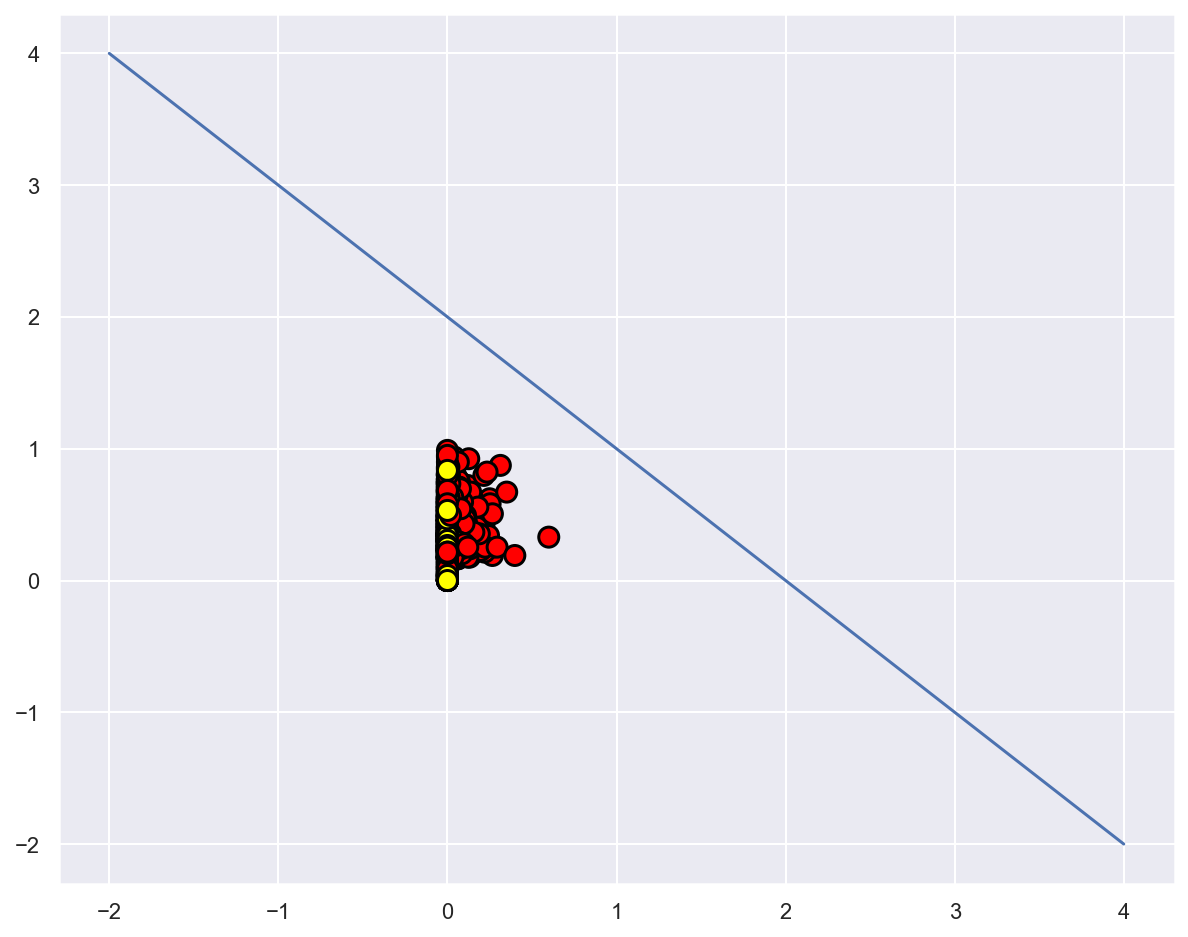

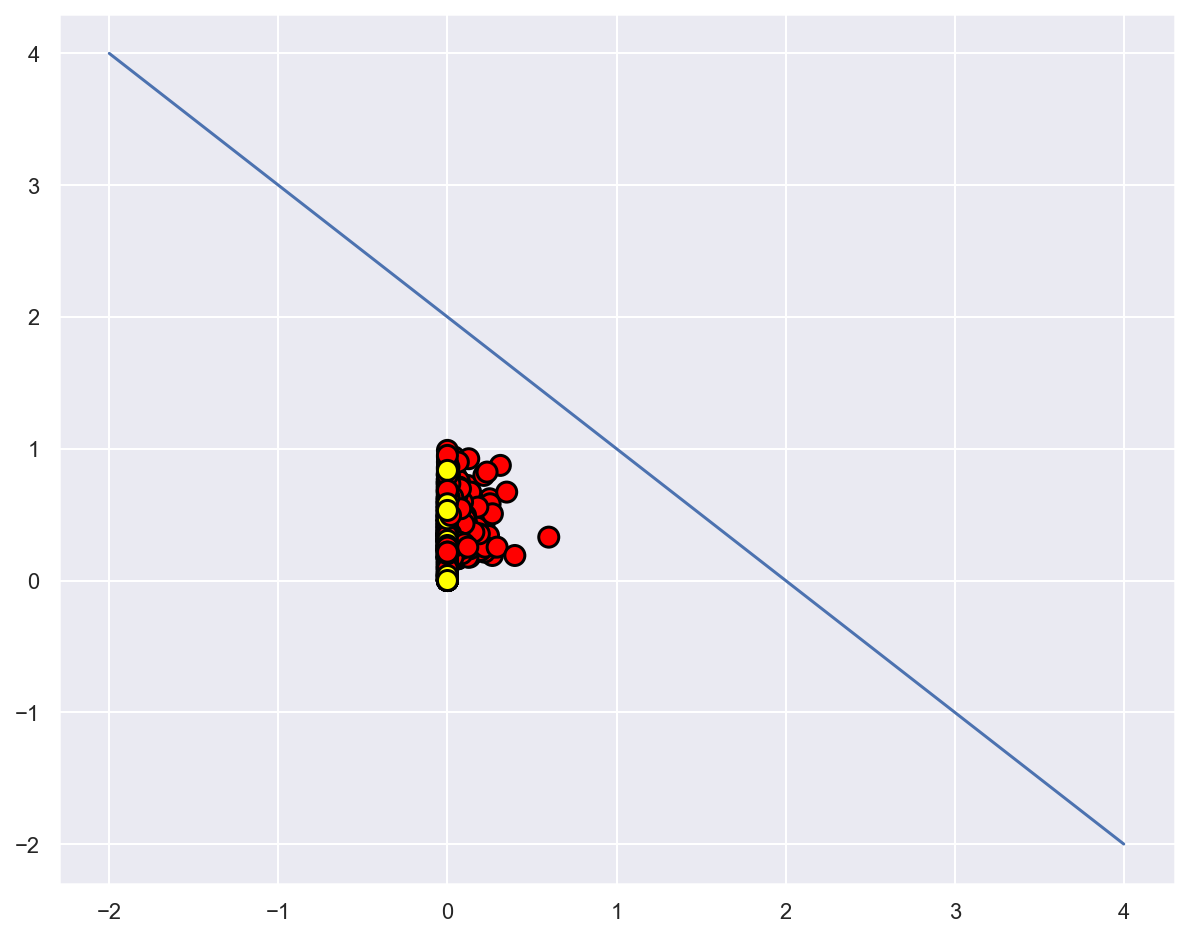

In [83]:
plt.figure(figsize=(10, 8))
plt.scatter(
    X_test['RoomService'],
    X_test['Age'],
    c=y_test,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

plt.figure(figsize=(10, 8))
plt.scatter(
    X_test['RoomService'],
    X_test['Age'],
    c=KNN_clf.predict(X_test),
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

In [84]:
dict(X_test.loc[304]), y_test.loc[304].item()

({'HomePlanet': 2.0,
  'CryoSleep': 0.0,
  'Age': 0.24050632911392406,
  'VIP': 0.0,
  'RoomService': 0.029105883995253715,
  'FoodCourt': 0.011706302619662563,
  'ShoppingMall': 0.026987910778137236,
  'Spa': 0.00013388075687254553,
  'VRDeck': 0.04379894749927485},
 1)

In [85]:
def calculate_dist_table_for_point(point, X_test, X_train, y_train, neighbours):
    distance_HomePlanet = (((X_train['HomePlanet'] - X_test.loc[point,'HomePlanet'])**2)**0.5).sort_index()
    distance_CryoSleep = (((X_train['CryoSleep'] - X_test.loc[point,'CryoSleep'])**2)**0.5).sort_index()
    distance_Age = (((X_train['Age'] - X_test.loc[point,'Age'])**2)**0.5).sort_index()
    distance_VIP = (((X_train['VIP'] - X_test.loc[point,'VIP'])**2)**0.5).sort_index()
    distance_RoomService = (((X_train['RoomService'] - X_test.loc[point,'RoomService'])**2)**0.5).sort_index()
    distance_FoodCourt = (((X_train['FoodCourt'] - X_test.loc[point,'FoodCourt'])**2)**0.5).sort_index()
    distance_ShoppingMall = (((X_train['ShoppingMall'] - X_test.loc[point,'ShoppingMall'])**2)**0.5).sort_index()
    distance_Spa = (((X_train['Spa'] - X_test.loc[point,'Spa'])**2)**0.5).sort_index()
    distance_VRDeck = (((X_train['VRDeck'] - X_test.loc[point,'VRDeck'])**2)**0.5).sort_index()
    distances_to_point = pd.concat((distance_HomePlanet, distance_CryoSleep, distance_Age, distance_VIP, distance_RoomService, distance_FoodCourt, distance_ShoppingMall, distance_Spa, distance_VRDeck), axis=1).rename(columns={'HomePlanet':'distance_HomePlanet', 'CryoSleep':'distance_CryoSleep', 'Age':'distance_Age', 'VIP':'distance_VIP', 'RoomService':'distance_RoomService', 'FoodCourt':'distance_FoodCourt', 'ShoppingMall':'distance_ShoppingMall', 'Spa':'distance_Spa', 'VRDeck':'distance_VRDeck'})
    distances_to_point = pd.concat((distances_to_point.sum(axis=1), y_train), axis=1).rename(columns={0:'dist'}).sort_values('dist', ascending=True).reset_index().drop('index',axis=1)
    data1 = distances_to_point.loc[:neighbours, 'Transported'].value_counts()
    if len(data1) == 2 and data1[0] > data1[1]:
        return data1.index[0]
    elif len(data1) == 2 and data1[1] > data1[0]:
        return data1.index[1]
    elif len(data1) == 1:
        return data1.index[0]
    elif len(data1) == 2 and data1[0] == data1[1]:
        count = 1
        for i in range(1,5):
            limit = neighbours+count
            data1 = distances_to_point.loc[:limit, 'Transported'].value_counts()
            if len(data1) == 2 and data1[0] > data1[1]:
                return data1.index[0]
            elif len(data1) == 2 and data1[1] > data1[0]:
                return data1.index[1]
            elif len(data1) == 1:
                return data1.index[0]
            count += 1
        
#     print(dict(distances_to_point.loc[:neighbours, 'Transported'].value_counts()))
#     print(f'true label is {y_test.loc[point]}')

In [86]:
for_test = pd.concat((X_test, y_test),axis=1)
for_test

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
304,2,0,0.240506,0,0.029106,0.011706,0.026988,0.000134,0.043799,1
2697,0,0,0.227848,0,0.000279,0.030322,0.000000,0.000000,0.000041,0
8424,0,1,0.518987,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1672,0,0,0.443038,0,0.000000,0.011337,0.018560,0.000000,0.000000,1
8458,1,1,0.544304,0,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
7175,0,1,0.202532,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
3187,0,1,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1
1302,0,0,0.215190,0,0.001466,0.000000,0.029372,0.011603,0.000207,0
5934,2,1,0.531646,0,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [87]:
for point in for_test.index.tolist():
    for_test.loc[point, 'prediction_n20'] = calculate_dist_table_for_point(point=point, X_test=X_test, X_train=X_train, y_train=y_train, neighbours=20)

In [88]:
# 20 neightbours
accuracy = (for_test['Transported'] == for_test['prediction_n20']).astype('int64').sum() / (for_test['Transported'] == for_test['prediction_n20']).astype('int64').count()
accuracy

0.6325474410580794

In [89]:
for point in for_test.index.tolist():
    for_test.loc[point, 'prediction_n11'] = calculate_dist_table_for_point(point=point, X_test=X_test, X_train=X_train, y_train=y_train, neighbours=11)

In [90]:
# 11 neighbours
accuracy = (for_test['Transported'] == for_test['prediction_n11']).astype('int64').sum() / (for_test['Transported'] == for_test['prediction_n11']).astype('int64').count()
accuracy

0.6566992524439333

In [91]:
for point in for_test.index.tolist():
    for_test.loc[point, 'prediction_n3'] = calculate_dist_table_for_point(point=point, X_test=X_test, X_train=X_train, y_train=y_train, neighbours=3)

In [92]:
# 3 neighbours
accuracy = (for_test['Transported'] == for_test['prediction_n3']).astype('int64').sum() / (for_test['Transported'] == for_test['prediction_n3']).astype('int64').count()
accuracy

0.7193789534215066

In [93]:
for point in for_test.index.tolist():
    for_test.loc[point, 'prediction_n2'] = calculate_dist_table_for_point(point=point, X_test=X_test, X_train=X_train, y_train=y_train, neighbours=2)

In [94]:
# 2 neighbours
accuracy = (for_test['Transported'] == for_test['prediction_n2']).astype('int64').sum() / (for_test['Transported'] == for_test['prediction_n2']).astype('int64').count()
accuracy

0.7274295572167913

In [95]:
for point in for_test.index.tolist():
    for_test.loc[point, 'prediction_n4'] = calculate_dist_table_for_point(point=point, X_test=X_test, X_train=X_train, y_train=y_train, neighbours=4)

In [96]:
# 4 neighbours
accuracy = (for_test['Transported'] == for_test['prediction_n4']).astype('int64').sum() / (for_test['Transported'] == for_test['prediction_n4']).astype('int64').count()
accuracy

0.7009775733179988

In [97]:
for point in for_test.index.tolist():
    for_test.loc[point, 'prediction_n5'] = calculate_dist_table_for_point(point=point, X_test=X_test, X_train=X_train, y_train=y_train, neighbours=5)

In [98]:
# 5 neighbours
accuracy = (for_test['Transported'] == for_test['prediction_n5']).astype('int64').sum() / (for_test['Transported'] == for_test['prediction_n5']).astype('int64').count()
accuracy

0.6900517538815412

In [102]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [103]:
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

df["International plan"] = pd.factorize(df["International plan"])[0]
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]
df.drop(["State", "Churn"], axis=1, inplace=True)

In [104]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [105]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(
    df.values, y, test_size=0.3, random_state=17
)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train);

In [106]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)  # 0.94

0.94

In [107]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_holdout, knn_pred)  # 0.89

0.89

In [108]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {"max_depth": range(1, 11), "max_features": range(4, 19)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [109]:
tree_grid.best_params_ 

{'max_depth': 6, 'max_features': 17}

In [110]:
tree_grid.best_score_ 

0.94257014456259

In [111]:
accuracy_score(y_train, tree_grid.predict(X_train))  

0.9644234890698671

In [112]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))  

0.946

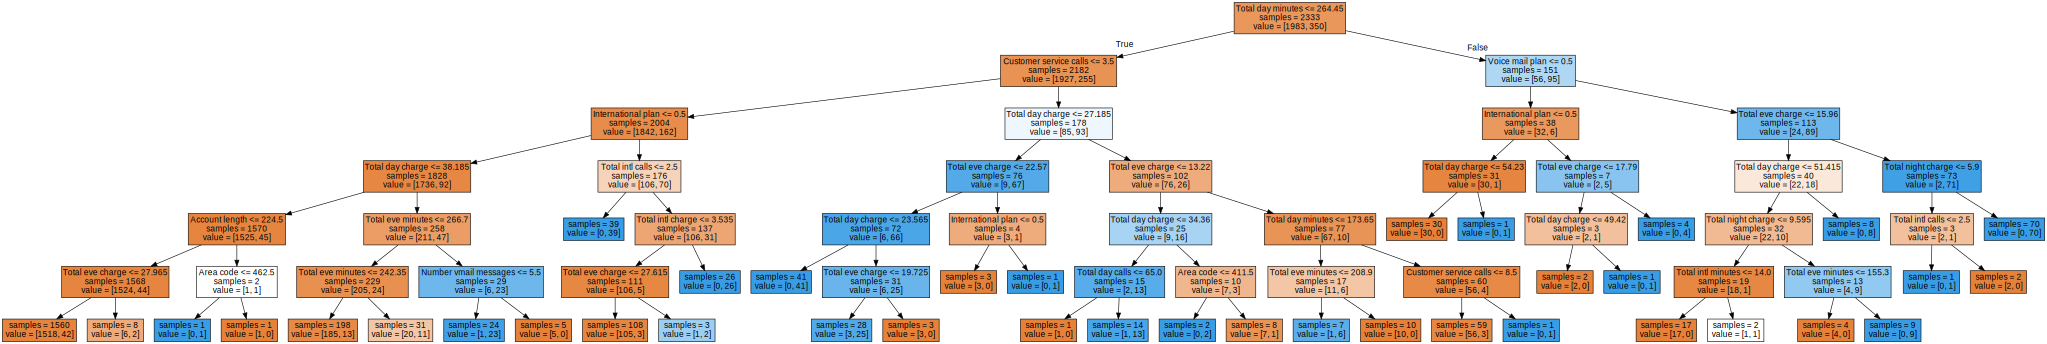

In [113]:
from sklearn.tree import export_graphviz
export_graphviz(tree_grid.best_estimator_, out_file="tree_class.dot", feature_names=df.columns, impurity=False, filled=True)

import graphviz
with open("tree_class.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [114]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'knn__n_neighbors': 7}, 0.8859867109023905)

In [115]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout)) 

0.89

In [116]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))  # 0.949

0.9494233119813256


In [117]:
forest_params = {"max_depth": range(6, 12), "max_features": range(4, 19)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_  # ({'max_depth': 9, 'max_features': 6}, 0.951)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


({'max_depth': 9, 'max_features': 6}, 0.9511372931045574)

In [118]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.953

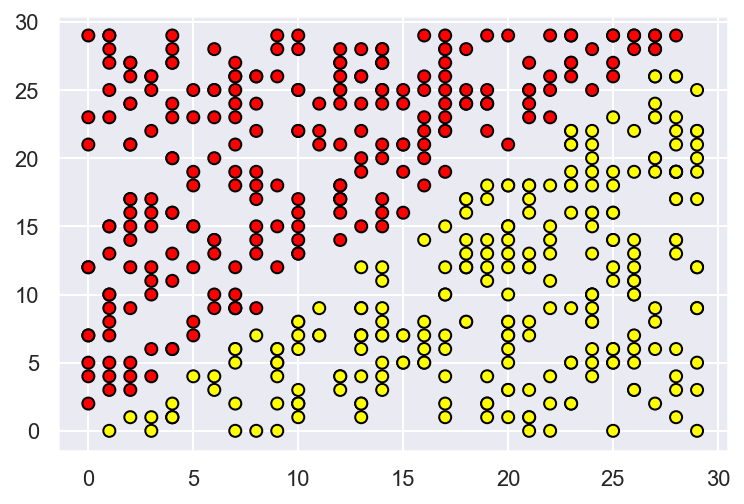

In [119]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)


X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="autumn", edgecolors="black");

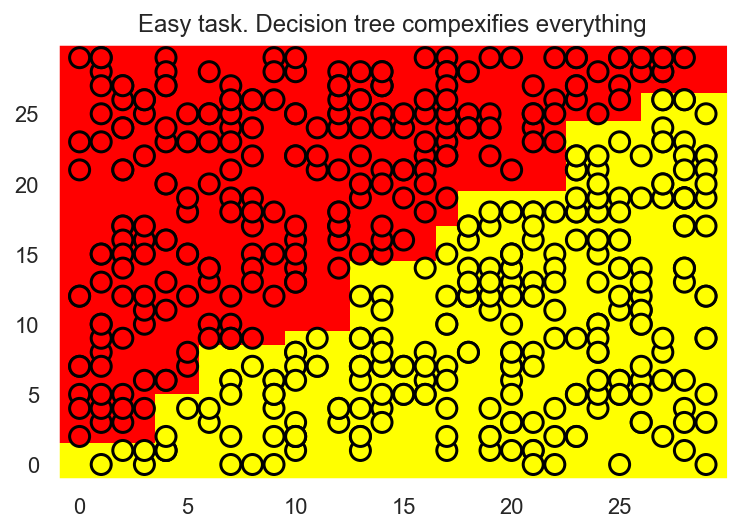

In [120]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    X[:, 0], X[:, 1], c=y, s=100, cmap="autumn", edgecolors="black", linewidth=1.5
)
plt.title("Easy task. Decision tree compexifies everything");

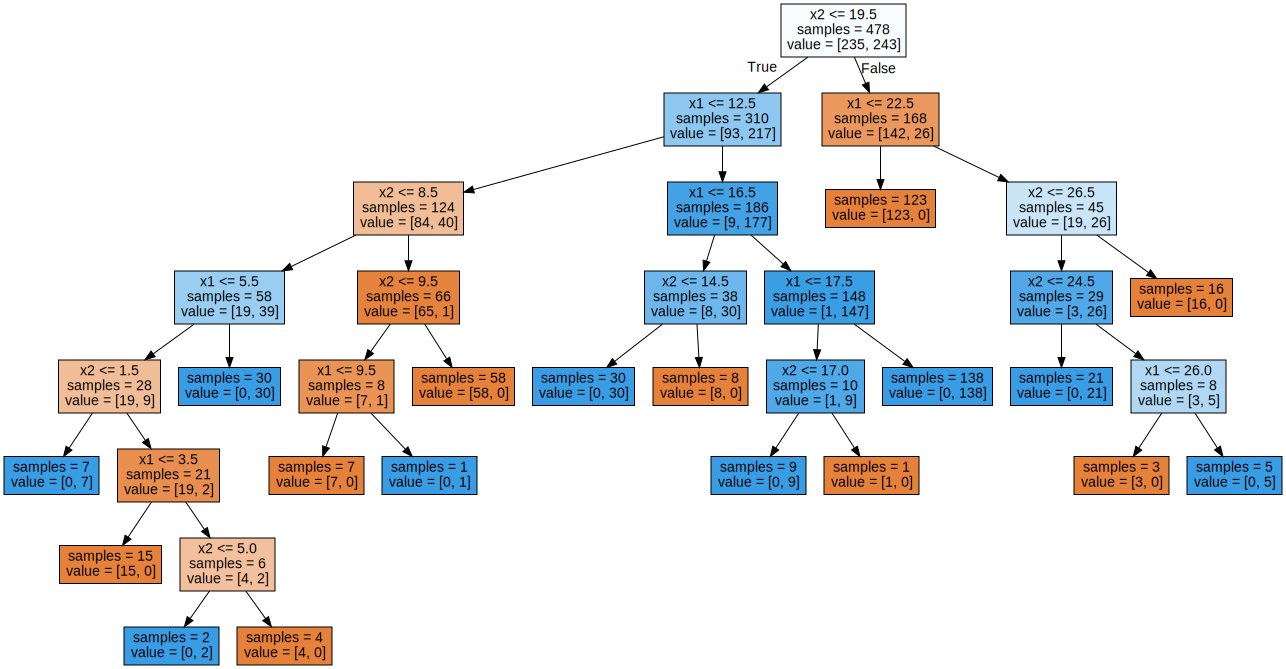

In [121]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_class.dot", feature_names=["x1", "x2"], impurity=False, filled=True)

import graphviz
with open("tree_class.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [123]:
# tree_graph_to_png(
#     tree=tree,
#     feature_names=["x1", "x2"],
#     png_file_to_save="C:/datasets/topic3_decision_tree5.png",
# )

In [137]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

from sklearn.preprocessing import MinMaxScaler

scal = MinMaxScaler()
X = scal.fit_transform(X)

X[1, :].reshape([8, 8])

array([[0.        , 0.        , 0.        , 0.75      , 0.8125    ,
        0.3125    , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.6875    , 1.        ,
        0.5625    , 0.        , 0.        ],
       [0.        , 0.        , 0.1875    , 0.9375    , 1.        ,
        0.375     , 0.        , 0.        ],
       [0.        , 0.46666667, 0.9375    , 1.        , 1.        ,
        0.125     , 0.        , 0.        ],
       [0.        , 0.        , 0.0625    , 1.        , 1.        ,
        0.1875    , 0.        , 0.        ],
       [0.        , 0.        , 0.0625    , 1.        , 1.        ,
        0.375     , 0.        , 0.        ],
       [0.        , 0.        , 0.0625    , 1.        , 1.        ,
        0.375     , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.6875    , 1.        ,
        0.625     , 0.        , 0.        ]])

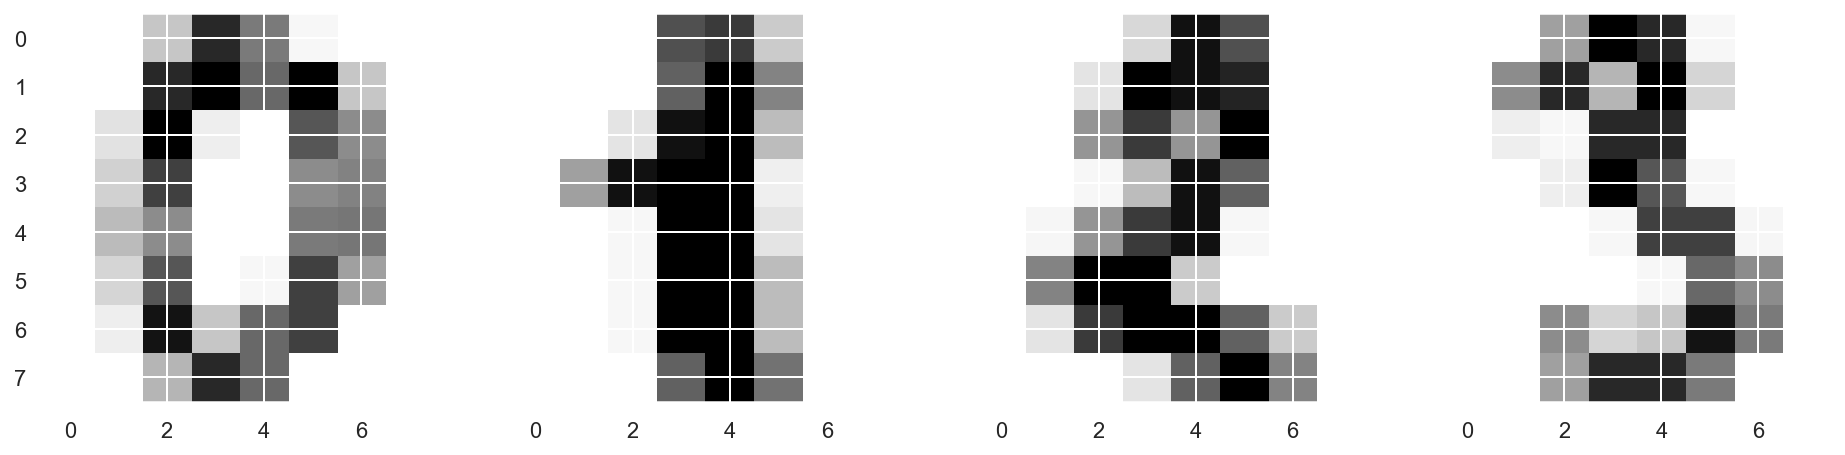

In [138]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6))
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap="Greys");

In [139]:
data['data'].shape

(1797, 64)

In [140]:
data['target'].shape

(1797,)

In [141]:
data['feature_names'][:5] # 64 pixels vector

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']

In [142]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [143]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=10))]
)

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);

In [144]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(
    y_holdout, tree_pred
)  # (0.976, 0.666)

(0.975925925925926, 0.6666666666666666)

In [145]:
data['feature_names']

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

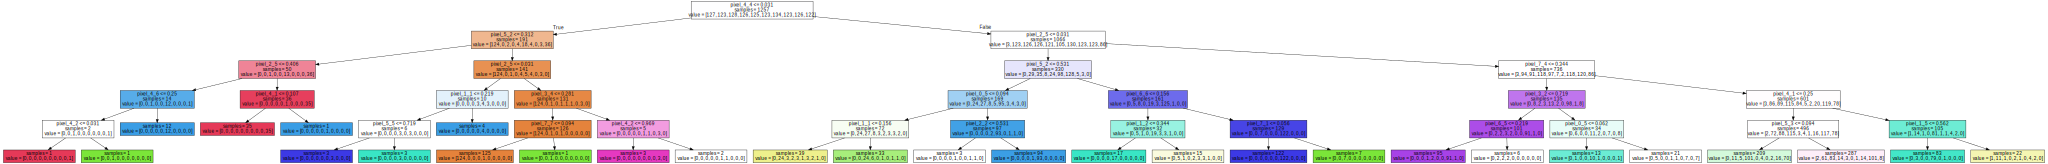

In [146]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_class.dot", feature_names=data['feature_names'], impurity=False, filled=True)

import graphviz
with open("tree_class.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [147]:
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

tree_graph_to_png(
    tree=tree,
    feature_names=data['feature_names'],
    png_file_to_save="C:/datasets/topic3_decision_tree9.png",
)

In [148]:
tree_params = {
    "max_depth": [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
    "max_features": [1, 2, 3, 5, 10, 20, 30, 50, 64],
}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [149]:
tree_grid.best_params_, tree_grid.best_score_  # ({'max_depth': 20, 'max_features': 64}, 0.844)

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [150]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.8425925925925926

In [151]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # first feature is proportional to target
    x1 = 0.3 * y

    # other features are noise

    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y


X, y = form_noisy_data()

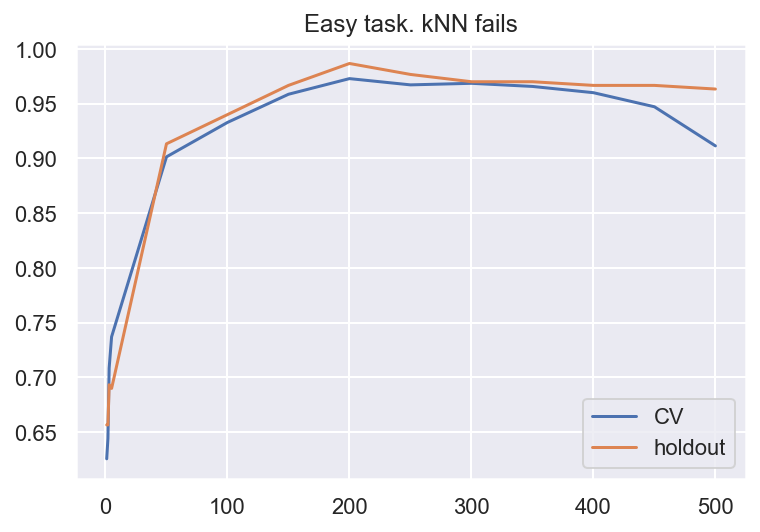

In [152]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)

from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn_pipe = Pipeline(
        [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    )
    cv_scores.append(np.mean(cross_val_score(knn_pipe, X_train, y_train, cv=5)))
    knn_pipe.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn_pipe.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label="CV")
plt.plot(n_neighb, holdout_scores, label="holdout")
plt.title("Easy task. kNN fails")
plt.legend();

In [153]:
tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print("Decision tree. CV: {}, holdout: {}".format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0
